In [3]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 

In [19]:

df = pd.read_csv('essay.csv', index_col=False,sep=',')
text = df[df.cNEU==1].TEXT


count = CountVectorizer()
word_count=count.fit_transform(text)
print(word_count)

  (0, 16064)	2
  (0, 5538)	3
  (0, 7705)	1
  (0, 5335)	1
  (0, 4932)	2
  (0, 14920)	2
  (0, 9489)	1
  (0, 3297)	1
  (0, 1992)	1
  (0, 7722)	1
  (0, 3288)	1
  (0, 3024)	1
  (0, 11029)	1
  (0, 8877)	2
  (0, 12236)	3
  (0, 8826)	1
  (0, 10987)	1
  (0, 9325)	1
  (0, 10474)	1
  (0, 13107)	2
  (0, 3185)	1
  (0, 7008)	1
  (0, 15672)	1
  (0, 11590)	1
  (0, 9718)	1
  :	:
  (1232, 13512)	1
  (1232, 3401)	1
  (1232, 376)	1
  (1232, 4065)	1
  (1232, 3166)	1
  (1232, 3384)	1
  (1232, 2144)	1
  (1232, 4786)	1
  (1232, 15441)	2
  (1232, 13111)	3
  (1232, 13113)	1
  (1232, 5261)	1
  (1232, 5842)	1
  (1232, 9970)	1
  (1232, 2168)	1
  (1232, 10147)	1
  (1232, 15292)	1
  (1232, 4070)	1
  (1232, 12489)	1
  (1232, 13128)	1
  (1232, 4675)	1
  (1232, 5357)	1
  (1232, 13281)	1
  (1232, 11768)	1
  (1232, 11485)	1


In [20]:
word_count.shape

#Existem 2467 frases e 30036 palavras unicas

(1233, 16631)

In [21]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count)

TfidfTransformer()

In [22]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count.get_feature_names(),columns=["idf_weights"]) 

/opt/homebrew/anaconda3/envs/py3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:

df_idf.sort_values(by=['idf_weights'])

,idf_weights
think,1.067027
like,1.096932
know,1.118594
go,1.124083
time,1.128681
...,...
inteligent,7.424869
intemidate,7.424869
intensely,7.424869
instable,7.424869


In [24]:
#tfidf

tf_idf_vector=tfidf_transformer.transform(word_count)
feature_names = count.get_feature_names()

/opt/homebrew/anaconda3/envs/py3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
first_document_vector=tf_idf_vector[1]
df_tfifd= pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])




In [26]:
df_tfifd.sort_values(by=["tfidf"],ascending=False)

,tfidf
country,0.300937
crash,0.241431
remember,0.221084
plane,0.196298
pride,0.192342
...,...
fervor,0.000000
fest,0.000000
fester,0.000000
festival,0.000000


In [35]:

from wordcloud import WordCloud

def tf_idf (big5):
    df = pd.read_csv('essay_verbs_adj_noun.csv', index_col=False,sep=',')
    text = df[df[big5]==1].TEXT

    print(text)


    count = CountVectorizer()
    word_count=count.fit_transform(text)
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(word_count)
   # df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count.get_feature_names(),columns=["idf_weights"]) 
   # df_idf.sort_values(by=['idf_weights'])



    tf_idf_vector=tfidf_transformer.transform(word_count)
    feature_names = count.get_feature_names()

    first_document_vector=tf_idf_vector[1]
    df_tfifd= pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])

    dataframe = df_tfifd.sort_values(by=["tfidf"],ascending=False)

    dataframe['feature_names'] = dataframe.index
    dataframe = dataframe.drop(dataframe[dataframe.tfidf == 0].index)
    dataframe = dataframe.drop(dataframe[dataframe.feature_names == 'bps'].index)
    #print(dataframe)  # list(dataframe.features_names)
    
    weights = {}
    for row in dataframe.itertuples():
        weights [row.feature_names] =row.tfidf



    

    #dataframe.to_csv(big5 +'.verbs_adj_noun.csv', index=False)

    return weights






In [ ]:
#tf_idf ('cNEU')
#tf_idf ('cAGR')
weights = tf_idf ('cCON')
#tf_idf ('cOPN')
#tf_idf ('cEXT')


1       begin stream consciousness writing assignment ...
2       server take minute upload connect bps tired ge...
6       way feel interest experience emotion time mind...
7       guess type minute interesting know think borin...
10      week start feel little home scared leave quest...
                              ...                        
2460    week catch mind numb information present fun f...
2463    excited columnist like daily texan opportunity...
2464    stress time frustrated tired thing academic si...
2465    sick nose run feel shit think sick make look u...
2466    good mood know morning dead think feel day wak...
Name: TEXT, Length: 1271, dtype: object


/opt/homebrew/anaconda3/envs/py3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


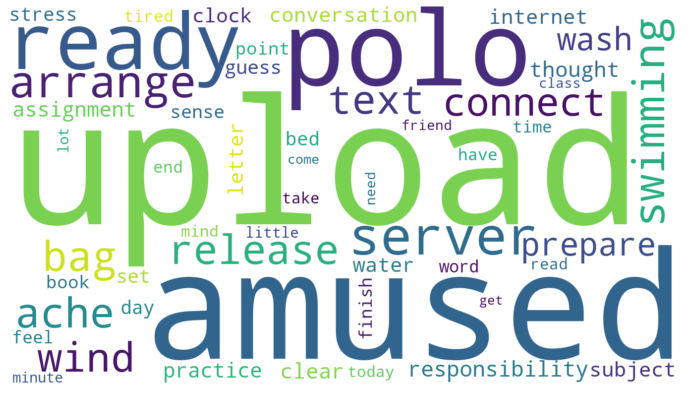

In [36]:

#Obter word

#weights =tf_idf ('cNEU')
#weights = tf_idf ('cAGR')
#weights = tf_idf ('cCON')
weights =tf_idf ('cOPN')
#tf_idf ('cEXT')

import matplotlib.pyplot as plt



plt.figure(figsize=(14,7))
word_cloud = WordCloud( max_words = 200, width=1366, height=768, background_color="white").generate_from_frequencies(weights)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
#plt.title('Palavras mais frequentes nos textos classificados como Paranoid',fontsize=20)
plt.show()



#Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies



Neuroticis:

['country', 'crash', 'remember', 'plane', 'pride', 'people', 'backyard', 'tridelt', 'greek', 'attack', 'twin', 'lose', 'watch', 'news', 'life', 'tower', 'pledge', 'today', 'day', 'event', 'night', 'remembering', 'sorrow', 'prioroty', 'forgetting', 'atfirst', 'ately', 'reassuring', 'momburger', 'exauste', 'story', 'theis', 'overtake', 'unite', 'awesome', 'horrific', 'kill', 'terrorism', 'mourning', '2002', 'exactly', 'worship', 'praise', 'socialize', 'bark', 'campus', 'girl', 'awe', 'th', 'flag', 'deeply', 'dye', 'desperately', 'second', 'retreat', 'nation', 'participate', 'shock', 'emily', 'helpful', 'bond', 'occur', 'disappoint', 'creative', 'risk', 'overcome', 'escape', 'lord', 'chill', 'stranger', 'september', 'american', 'christian', 'daily', 'field', 'term', 'burn', 'heat', 'background', 'come', 'process', 'system', 'fun', 'quit', 'touch', 'focus', '11', 'getting', 'proud', 'street', 'join', 'save', 'fight', 'amazing', 'sorority', 'saturday', 'inside', 'complete', 'number', 'extremely', 'dog', 'year', 'picture', 'time', 'one', 'go', 'know', 'forever', 'hold', 'think', 'try', 'moment', 'tv', 'cry', 'begin', 'lot', 'important', 'teacher', 'usually', 'late', 'excited', 'experience', 'eye', 'class', 'house', 'sad', 'matter', 'fact', 'get', 'close', 'feel', 'writing', 'easy', 'thing', 'good', 'turn', 'feeling', 'walk', 'call', 'family', 'cool', 'happy', 'old', 'happen', 'help', 'have', 'meet', 'new', 'guy', 'leave', 'college', 'well', 'love', 'look', 'hope', 'talk', 'work', 'school', 'friend', 'right', 'want', 'like']

only verbs + adj: 

['remember', 'crash', 'twin', 'greek', 'lose', 'watch', 'reassuring', 'exauste', 'unite', 'overtake', 'awesome', 'second', 'horrific', 'worship', 'kill', 'bark', 'bond', 'risk', 'socialize', 'dye', 'participate', 'helpful', 'occur', 'disappoint', 'creative', 'american', 'overcome', 'daily', 'touch', 'burn', 'come', 'fight', 'quit', 'proud', 'join', 'save', 'amazing', 'complete', 'hold', 'go', 'know', 'try', 'think', 'cry', 'begin', 'important', 'excited', 'sad', 'close', 'get', 'fun', 'feel', 'turn', 'easy', 'good', 'walk', 'call', 'cool', 'happy', 'old', 'help', 'happen', 'have', 'meet', 'new', 'leave', 'love', 'work', 'look', 'hope', 'talk', 'want']


verbs + adj+ noum 

['country', 'crash', 'remember', 'plane', 'pride', 'people', 'backyard', 'greek', 'twin', 'attack', 'lose', 'news', 'watch', 'life', 'tower', 'pledge', 'day', 'today', 'event', 'night', 'reassuring', 'forgetting', 'exauste', 'remembering', 'sorrow', 'prioroty', 'story', 'unite', 'overtake', 'tridelt', 'awesome', 'horrific', 'kill', 'terrorism', 'mourning', 'worship', 'campus', 'praise', 'bark', 'awe', 'girl', 'socialize', 'flag', 'dye', 'second', 'nation', 'retreat', 'participate', 'shock', 'helpful', 'bond', 'disappoint', 'occur', 'risk', 'creative', 'overcome', 'american', 'daily', 'chill', 'stranger', 'field', 'term', 'heat', 'burn', 'background', 'come', 'process', 'system', 'fun', 'quit', 'touch', 'street', 'focus', 'proud', 'join', 'save', 'fight', 'amazing', 'sorority', 'complete', 'number', 'dog', 'year', 'picture', 'time', 'one', 'go', 'know', 'hold', 'think', 'try', 'tv', 'moment', 'cry', 'begin', 'lot', 'important', 'matter', 'teacher', 'excited', 'experience', 'eye', 'house', 'class', 'sad', 'fact', 'close', 'get', 'feel', 'easy', 'thing', 'writing', 'good', 'turn', 'feeling', 'walk', 'call', 'cool', 'family', 'happy', 'old', 'happen', 'help', 'have', 'meet', 'new', 'guy', 'leave', 'love', 'look', 'hope', 'talk', 'school', 'work', 'friend', 'want']

------
Agreeableness,

['pearland', 'blah', 'rate', 'town', 'miss', 'friend', '46', '54', 'people', 'new', 'sure', 'go', 'kind', 'sam', 'like', 'break', '35', 'realize', 'feel', 'rambling', 'close', '25', 'stay', 'call', 'surround', 'assume', 'happen', 'mom', 'different', 'wednesday', 'regret', '00', 'list', 'guy', 'etc', 'get', 'basically', 'leave', 'typing', 'consider', 'child', 'comfortable', 'certain', 'consciousness', 'university', 'tell', 'houston', 'future', 'exactly', '10', 'visit', 'movie', 'stream', 'date', 'bother', 'texas', 'okay', 'begin', 'couple', 'bed', 'ago', 'decide', 'experience', 'come', 'hang', 'class', 'fast', 'learn', 'spend', 'writing', 'far', 'sound', 'thing', 'reason', 'hurt', 'good', 'watch', 'happy', 'feeling', 'easy', 'old', 'hear', 'sleep', 'parent', 'away', 'roommate', 'help', 'meet', 'weekend', 'probably', 'mean', 'actually', 'room', 'assignment', 'week', 'fun', 'night', 'oh', 'today', 'college', 'little', 'year', 'home', 'write', 'talk', 'guess', 'way', 'lot', 'day', 'want', 'time', 'think']

only verbs + adj: 

['miss', 'new', 'sure', 'break', 'go', 'rambling', 'realize', 'feel', 'stay', 'call', 'surround', 'assume', 'happen', 'different', 'experience', 'get', 'leave', 'date', 'consider', 'comfortable', 'certain', 'tell', 'visit', 'bother', 'begin', 'hang', 'decide', 'come', 'sound', 'close', 'sleep', 'learn', 'spend', 'good', 'hurt', 'watch', 'happy', 'easy', 'old', 'hear', 'help', 'meet', 'mean', 'little', 'write', 'talk', 'guess', 'like', 'want', 'think']

verbs + adj+ noum 


['rate', 'town', 'miss', 'friend', 'people', 'new', 'sure', 'go', 'break', 'realize', 'feel', 'rambling', 'stay', 'call', 'surround', 'assume', 'mom', 'happen', 'different', 'regret', 'list', 'guy', 'get', 'leave', 'typing', 'consider', 'child', 'consciousness', 'comfortable', 'certain', 'tell', 'future', 'stream', 'movie', 'visit', 'date', 'bother', 'begin', 'couple', 'bed', 'decide', 'experience', 'come', 'hang', 'class', 'close', 'learn', 'spend', 'writing', 'sound', 'thing', 'reason', 'hurt', 'good', 'watch', 'happy', 'feeling', 'easy', 'old', 'hear', 'sleep', 'home', 'parent', 'roommate', 'help', 'meet', 'weekend', 'mean', 'room', 'assignment', 'week', 'fun', 'night', 'college', 'today', 'little', 'year', 'write', 'talk', 'way', 'guess', 'lot', 'day', 'like', 'want', 'time', 'think']
--------------

Conscientiousness

['32000', 'amused', 'bps', 'seemingly', 'upload', 'polo', 'ready', 'server', 'arrange', 'swimming', 'release', 'text', 'bag', 'ache', 'wind', 'connect', 'responsibility', 'clear', 'prepare', 'thought', 'wash', 'conversation', 'assignment', 'practice', 'subject', 'letter', 'water', 'internet', 'clock', 'houston', 'set', 'totally', 'guess', 'sense', 'day', 'point', 'stress', 'bed', 'book', 'finish', 'word', 'feel', 'end', 'time', 'tired', 'have', 'read', 'mind', 'take', 'today', 'little', 'minute', 'lot', 'need', 'friend', 'come', 'class', 'right', 'get']

only verbs + adj: 
['amused', 'upload', 'ready', 'wind', 'arrange', 'release', 'ache', 'connect', 'clear', 'prepare', 'wash', 'set', 'guess', 'end', 'finish', 'feel', 'tired', 'have', 'read', 'take', 'little', 'need', 'come', 'get']

verbs + adj+ noum 

['amused', 'bps', 'polo', 'upload', 'ready', 'server', 'arrange', 'swimming', 'release', 'text', 'bag', 'ache', 'wind', 'connect', 'responsibility', 'clear', 'prepare', 'thought', 'wash', 'conversation', 'assignment', 'practice', 'subject', 'letter', 'water', 'internet', 'clock', 'set', 'guess', 'sense', 'day', 'point', 'stress', 'bed', 'book', 'word', 'finish', 'feel', 'end', 'time', 'tired', 'have', 'read', 'mind', 'take', 'little', 'today', 'minute', 'lot', 'need', 'friend', 'come', 'class', 'get']

---------
Openness


['32000', 'bps', 'upload', 'seemingly', 'amused', 'polo', 'ready', 'arrange', 'server', 'swimming', 'ache', 'bag', 'release', 'wind', 'text', 'prepare', 'connect', 'wash', 'responsibility', 'clear', 'thought', 'assignment', 'practice', 'subject', 'letter', 'water', 'conversation', 'houston', 'internet', 'clock', 'set', 'totally', 'guess', 'day', 'stress', 'bed', 'sense', 'point', 'book', 'finish', 'feel', 'word', 'end', 'tired', 'time', 'have', 'take', 'read', 'mind', 'today', 'little', 'minute', 'lot', 'need', 'class', 'friend', 'come', 'right', 'get']

only verbs + adj: 

['upload', 'amused', 'ready', 'arrange', 'wind', 'ache', 'release', 'connect', 'prepare', 'wash', 'clear', 'set', 'guess', 'end', 'finish', 'feel', 'tired', 'have', 'take', 'read', 'little', 'need', 'come', 'get']

verbs + adj+ noum 

['bps', 'upload', 'amused', 'polo', 'ready', 'server', 'arrange', 'swimming', 'ache', 'bag', 'release', 'wind', 'text', 'connect', 'prepare', 'wash', 'responsibility', 'clear', 'thought', 'assignment', 'practice', 'subject', 'letter', 'water', 'conversation', 'internet', 'clock', 'set', 'guess', 'day', 'stress', 'bed', 'sense', 'point', 'book', 'finish', 'feel', 'word', 'end', 'tired', 'time', 'have', 'take', 'read', 'mind', 'today', 'little', 'minute', 'lot', 'need', 'class', 'friend', 'come', 'get']

--------------------------
Extroversion
['bps', 'upload', '32000', 'amused', 'seemingly', 'server', 'polo', 'ready', 'arrange', 'swimming', 'text', 'release', 'ache', 'wind', 'bag', 'connect', 'responsibility', 'clear', 'thought', 'prepare', 'wash', 'assignment', 'practice', 'conversation', 'letter', 'subject', 'water', 'internet', 'houston', 'clock', 'guess', 'set', 'totally', 'sense', 'day', 'bed', 'stress', 'point', 'book', 'finish', 'word', 'feel', 'end', 'time', 'tired', 'have', 'read', 'take', 'mind', 'today', 'little', 'minute', 'lot', 'need', 'come', 'class', 'friend', 'right', 'get']



only verbs + adj: 

['upload', 'amused', 'ready', 'arrange', 'wind', 'release', 'ache', 'connect', 'clear', 'prepare', 'wash', 'set', 'guess', 'finish', 'end', 'feel', 'tired', 'have', 'read', 'take', 'little', 'need', 'come', 'get']

verbs + adj+ noum 

['upload', 'bps', 'amused', 'polo', 'server', 'ready', 'arrange', 'swimming', 'text', 'release', 'ache', 'wind', 'bag', 'connect', 'responsibility', 'clear', 'thought', 'prepare', 'wash', 'assignment', 'practice', 'conversation', 'letter', 'subject', 'water', 'internet', 'clock', 'guess', 'set', 'sense', 'day', 'bed', 'point', 'stress', 'book', 'finish', 'word', 'feel', 'end', 'time', 'tired', 'have', 'read', 'take', 'mind', 'today', 'little', 'minute', 'lot', 'need', 'come', 'class', 'friend', 'get']

Procura-se de seguida analisar a frequencia dessas palavras nos textos referentes a cada uma dessas personalidades;

Ou seja: 

 para p in big5:
    for word in p:
        quantas vezes word aparece nos textos p



In [108]:
NEU = []
AGR = []
CON = []
OPN = []
EXT = []

for row in df.itertuples():
    if (row.cOPN == 1):
        OPN.append(row.TEXT)
    if (row.cNEU == 1):
        NEU.append(row.TEXT)
    if (row.cAGR == 1):
        AGR.append(row.TEXT)
    if (row.cCON == 1):
        CON.append(row.TEXT)
    if (row.cEXT == 1):
        EXT.append(row.TEXT)


OPN = " ".join(OPN)
NEU = " ".join(NEU)
AGR = " ".join(AGR)
CON = " ".join(CON)
EXT = " ".join(EXT)

In [112]:
def count_words_string (string, w):
    return string.count(w)



EXT_WORDS = ['upload', 'amused', 'ready', 'arrange', 'wind', 'release', 'ache', 'connect', 
'clear', 'prepare', 'wash', 'set', 'guess', 'finish', 'end', 'feel', 'tired', 'have', 'read', 'take', 
'little', 'need', 'come', 'get']


for word in EXT_WORDS:
    print(word, EXT.count(word))

upload 1
amused 2
ready 171
arrange 11
wind 107
release 20
ache 329
connect 86
clear 71
prepare 62
wash 82
set 425
guess 1467
finish 324
end 5409
feel 3336
tired 581
have 622
read 1391
take 842
little 1008
need 2159
come 1725
get 2575
